# Discrete Random Variables

As mentioned in {doc}`definition`, we classify random variables based on their range. The reason we do this is that the mathematical tools we use to work such random variables vary depending  on their range. We will start with the easiest type to understand, which is the discrete random variable:

````{card}
DEFINITION
^^^
```{glossary}
discrete random variable
    A random variable is said to be a *discrete random variable* if its range is finite or countably infinite.
```
````

If $X$ is a discrete random variable, then we can find the probability of any subset of its values by summing over them:

$$
P(X \in A)  = \sum_{x \in A} P(X = x) \mbox{ if } A \subset \operatorname{Range}(X),
$$
where we have implicity taken advantage of the fact that the sets $\left\{ s \left \vert X(s) = x \right. \right\}$ are disjoint sets, as discussed in {doc}`definition`.

For any Borel set, $B$, we can express $P(B)$ as a finite sum over the values of $X$ that are in $B$ and in the range of $X$, since all other values of $X$ have probability zero:

$$
P(X \in B) = \sum_{x \in B \cap \operatorname{Range}(X)} P(X = x) \mbox{ if } B \in \mathcal{B}.
$$

Since both $x$ and $P(X=x)$ are real-valued, we define a function called the probability mass function to facilitate calculating these types of probabilities:

## Probability Mass Functions

````{card}
DEFINITION
^^^
```{glossary}
probability mass function (PMF)
   For a discrete random variable, $X$, the *probability mass function* of $X$ is the function $p_X(x)$ such that $p_X(x) = \operatorname{Pr}( X=x)$.
```
````

Note that 

\begin{align*}
\sum_{x \in \operatorname{Range}(X)} p_X(x) &= P\left[ X(s) \in \operatorname{Range}\left(X \right) \right] \\
&= P\left[\left\{ s \left \vert X(s) \in \operatorname{Range}\left(X \right) \right.  \right\} \right] \\
&= P\left[ s \in S \right] \\
&=1,
\end{align*}

as $x$ ranges over all possible values of $X$, the events $\left\{s \left \vert X(s)=x \right. \right\}$ are mutually exclusive and form a partition S.

When there is no confusion, we will drop the explicit mention of the range of $X$ and just write
\begin{align*}
\sum_{x } p_X(x) &= 1.
\end{align*}
Similarly, for any set $A \in \operatorname{Range}(X)$, we will write

$$
P(X\in A) = \sum_{x\in A} p_X(x).
$$


Given a functional definition of a random variable, we can find the probability mass function by:
* for each value $x \in \operatorname{Range}(X)$, find the set of outcomes for which $X(s)=x$, which we can write as $E_x=\left\{ s \left \vert X(s) = x \right. \right\}$. Then let $p_X(s) = P(E_x)$.
* for each value of $x \notin \operatorname{Range}(X)$, let $p_X(s) = 0$.

We illustrate this with some examples.


**Example 1**

Find the PMF for a binary RV $X(s)$ from tossing a fair coin.  This was Example 1 in {doc}`definition`. Please refer to that example for the detailed mathematical formulation of the probability space and functional definition of the random variable. Here, I only reproduce the figure, which illustrates the sample space and the mapping of the outcomes to real values by $X(s)$:

```{image} figs/binary-rv1.pdf
:alt: Image of handwritten versions of X,Y,Z and x,y,z with upper-case letters drawn without serifs and lower-case letters drawn with curly serifs
:width: 600px
```

From this, we see that $\operatorname{Range}(X) = \{ 0, 1\}$. Hence, we calculate:
* $p_X(0) = P\left[ X(s) = 0 \right] = P (\{T\}) = 1/2$, and
* $p_X(1) = P\left[ X(s) = 1 \right] = P (\{H\}) = 1/2$.

Then the PMF for $X$ is given by

$$
p_X(x) = 
\begin{cases}
\frac 1 2, & x \in \{0,1\} \\
0, & \mbox{o.w.}
\end{cases}.
$$

**Note that we often abbreviate "otherwise" in such formula as "o.w.".**

When we have a very simple PMF like this, we could implement in Python it for a single value of $x$  using if statements:

In [1]:
def p_X1(x):
    if x == 0 or x == 1:
        return 1/2
    else: 
        return 0

However, it is more useful to be able to return probabilities for a whole list or array of input values. We can use  NumPy's `piecewise()` function to provide the appropriate values by conducting these tests on a vector of values (although a single value will also still work). The call signature for `np.piecewise` is

`Signature: np.piecewise(x, condlist, funclist, *args, **kw)`

The `condlist` is a list of conditions, and the `funclist` is a **corresponding** list of functions. If condition $i$ from `condlist` evaluates as true for an input value, then function $i$ from `funclist` will be used to compute the output vaule. Here is how we can use it in action:

In [2]:
import numpy as np
def p_X(x):
    x = np.array(x).astype(float)
    return np.piecewise(x, [x==0, x==1], [0.5, 0.5, 0])

Here the line `x = x.astype(float)` is required to ensure that we can return an array of float values, even if the input contains all integers

Because PMFs generally only have values at a small subset of the reals, we use a special type of plot in which the nonzero values are drawn as sticks with balls at the values. Because of the shape of these plots, these are often called *lollipop plots*; however, these are called *stem plots* in Matplotlib. (Note that stem and leaf plots are something different). Lets plot the PMF for this random variable. As usual, we begin by importing `matplotlib.pyplot` and setting the plot  backend to render the plots inline in the notebook:

In [3]:
import matplotlib.pyplot  as plt
%matplotlib inline

Now, we put the values of x in a list or vector, and the pmf values in another list or vector and call `plt.stem()`:

We can make this much easier to interpret by adjusting the limits of the axes. First, we increase the $x$-axis to help illustrate the the PMF is zero outside the range $[0,1]$.  Because we are plotting over a larger range, we will also evaluate the PMF over a wider range, as shown for `x2` below. Second, we set the $y$-axis lower limit to zero and increase the upper limit so that it is easier to read off the maximum value of 0.5 for the PMF.

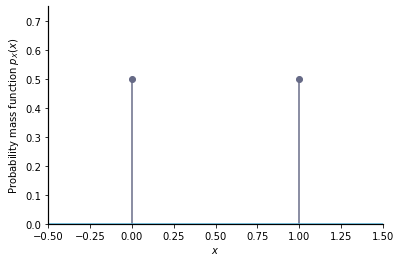

In [4]:
x2=[-1, 0, 1, 2]

plt.stem(x2, p_X(x2), use_line_collection=True)

plt.xlim(-0.5, 1.5)
plt.ylim(0, 0.75)

plt.xlabel('$x$')
plt.ylabel('Probability mass function $p_X(x)$');

**Example 2**

Find the PMF of the binary RV $Y$ from Example 2 of {doc}`definition` and for which the sample space and functional mapping are illustrated below:

```{image} figs/binary-rv2.pdf
:alt: 
:width: 600px
```

The range of $Y$ is the same as the range of $X$ in Example 1, $\operatorname{Range}(Y) = \{0, 1\}$.  However, the sample space and mapping from outcomes to values of the random variable is different than in Example 1. From the figure, we see that
* $p_Y(0) = P\left[ Y(s) = 0 \right] = P (\{TT\}) = 1/4$, and
* $p_Y(1) = P\left[ Y(s) = 1 \right] = P (\{HH, TH, HT \}) = 3/4$.

The PMF for $Y$ is given by

$$
p_Y(y) = 
\begin{cases}
\frac 1 4, & y =0 \\
\frac 3 4, & y =1 \\
0, & \mbox{o.w.}
\end{cases}.
$$

Here is an implementation in Python:

In [5]:
def p_Y(y):
    y = np.array(y).astype(float)
    return np.piecewise(y, [y == 0, y == 1], [1/4, 3/4, 0])

Here is a plot using the same approach as we did for Example 1:

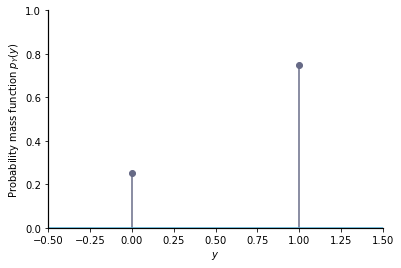

In [6]:
y = np.arange(-1, 3)
plt.stem(y, p_Y(y), use_line_collection=True)

plt.xlim(-0.5, 1.5)
plt.ylim(0, 1)

plt.xlabel('$y$')
plt.ylabel('Probability mass function $p_Y(y)$');

**Example 3**

Now consider the random variable $Z$ from Example 3 in {doc}`definition`. This random variable is created using the same probability space as the random variable in Example 2, but has a different range, $\operatorname{Range}(Z) = \{ 0,1,2\}$. From the figure, we see that
* $p_Z(0) = P\left[ Z(s) = 0 \right] = P (\{TT\}) = 1/4$, and
* $p_Z(1) = P\left[ Z(s) = 1 \right] = P (\{HT, TH\}) = 1/2$, and
* $p_Z(2) = P\left[ Z(s) = 2 \right] = P (\{HH \}) = 1/4$.

Thus, the PMF of $Z$ is
$$
p_Z(z) = 
\begin{cases}
\frac 1 4, & z \in \{0,2\} \\
\frac 1 2, & z =1 \\
0, & \mbox{o.w.}
\end{cases}.
$$

A Python implemetation is 

In [7]:
def p_Z(z):
    z = np.array(z).astype(float)
    return np.piecewise(z, [z == 0, z == 1, z == 2], [1/4, 1/2, 1/4, 0])

And here is the plot of the PMF of $Z$:

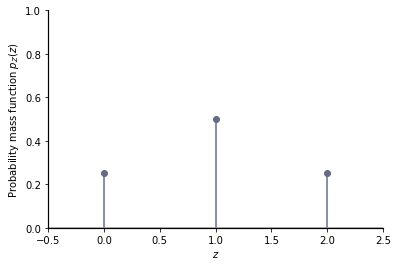

In [8]:
z= np.arange(-1, 4)
plt.stem(z, p_Z(z), use_line_collection=True)

plt.xlim(-0.5, 2.5)
plt.ylim(0, 1)

plt.xlabel('$z$')
plt.ylabel('Probability mass function $p_Z(z)$');

**Example 4**

In this example, we show how a random variable can be formed directly from the outcomes of a random experiment. In other words, for an experiment with a numerical outcome, we can let $X(s)=s$.

Create a probability space by rolling a fair 6-sided die and observing the top face. Let the event class be the power set of the sample space. Let the RV $W$ be defined by $W(s)$ for all $s \in S$.

Then $p_W(w) = P\left[ W(s) =w \right] = P( \{w\} )$ for $w \in \{1,2,3,4,5,6\}$. Since this is a fair experiment, $P(\{w\}) = 1/6$.  

The PMF for $W$ is
$$
p_W(w)  =
\begin{cases}
\frac{1}{6}, & w=1,2,\dots,6 \\ 
0, & \text{o.w.}
\end{cases}
$$ 


A Python implementation is shown below:

In [9]:
def p_W(w):
    w = np.array(w).astype(float)
    return np.piecewise(w, [np.isin(w, [1,2,3,4,5,6])], [1/6, 0] )

Here I used the `np.isin()` function to check each value of the $w$ array to see if it is in the range of $W$.

Here is the plot of the PMF of W:

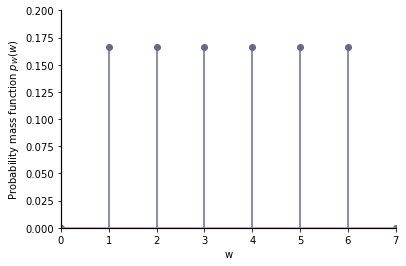

In [10]:
w = np.arange(0, 8)
plt.stem(w, p_W(w), use_line_collection = True)

plt.xlim(0,7)
plt.ylim(0,0.2)

plt.xlabel('w')
plt.ylabel('Probability mass function $p_W(w)$');

**Example 5**

Recall that discrete random variables can either have a finite range or a countably infinite range. Let's create an example of the latter. 

Flip a coin until heads occurs. Record the set of outcomes. Then the sample space is 

$$
S = \left\{ H, TH, TTH, TTH, TTTH, \ldots \right\}.
$$
It should be clear that there is no maximum number of flips until the first $H$ occurs, and it should also be intuitive that the shorter sequences are more probable than the latter ones. We know that $P(H)=P(T) = 1/2$, and the results of different flips can be assumed to be independent.  So 
\begin{align*}
P(H) &= \frac 1 2 \\
P(TH) &= \left( \frac 1 2 \right) \left( \frac 1 2 \right)  =\frac 1 4\\ 
P(TTH) &= \left( \frac 1 2 \right) \left( \frac 1 2 \right) \left( \frac 1 2 \right)   =\frac 1 8\\
\end{align*}

Let's introduce some notation. If a given sequence has $n-1$ $T$ followed by one $H$, we will write it as $T^{n-1}H$. Then 

$$
P(T^{n-1}H) = \frac{1}{2^{n}}.
$$

Let $N$ be a random variable that is equal to the number of flips until the first H occurs. Then if $n \in \{1,2,3,\ldots \}$,

\begin{align}
P\left[N(s) =n \right] &= P\left[ T^{n-1}H \right] \\
&= \left( \frac {1}{2} \right)^n.
\end{align}

The PMF of $N$ is 

$$
p_N(n) = 
\begin{cases}
\left( \frac {1}{2} \right) ^ n, & n = 1,2,3, \ldots\\
0, & \mbox{o.w.}
\end{cases}
$$

To implement this PMF in Python, we need a way to check whether the values of a NumPy array are positive integers. The floor function $\lfloor x \rfloor$ returns the largest integer that is less than or equal to $x$. Then $x - \lfloor x \rfloor $ is the fractional part of $x$, which is zero if and only if $x$ is an integer.  We can use the `np.floor()` function to return the floor of the elements in an array, as shown below:

In [11]:
x=np.linspace(-1,2,7)
print(x, x-np.floor(x)==0)

[-1.  -0.5  0.   0.5  1.   1.5  2. ] [ True False  True False  True False  True]


We can check that the values of the array are positive like this:

In [12]:
x>0

array([False, False, False,  True,  True,  True,  True])

Finally, we can use the Numpy function `np.logical_and()` to find the elementwise intersection of these arrays:

In [13]:
print(x, np.logical_and(x-np.floor(x)==0, x>0))

[-1.  -0.5  0.   0.5  1.   1.5  2. ] [False False False False  True False  True]


Using this approach, a Python implementation of this PMF is shown below:

In [14]:
def p_N(n):
    n = np.array(n).astype(float)
    return np.piecewise(n, [np.logical_and(n - np.floor(n) == 0, n > 0)], [lambda u: (1/2)**u, 0] )

In [15]:
p_N(x)

array([0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.25])

Note that this function uses one new feature that I didn't mention above. That is, I did not put `(1/2)**n` in the `funclist`. The reason is that we only want to raise $1/2$ to those values of $n$ that satisfy the conditions. Those elements that satisfy the first condition will be used as an input to the first function, and we use a *lambda function* to take that input into a variable $u$ and then apply the function (after the colon).

Because the PMF has infinite range, we can only generate the values for it and plot it over a finite subset of its range. Because the values of the PMF get small quickly, we will plot up to $n=8$.

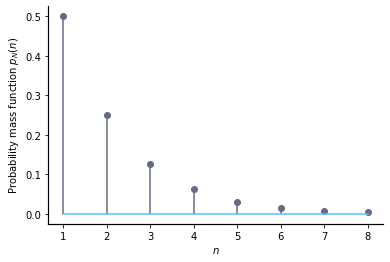

In [16]:
import numpy as np
n=np.arange(1, 9)

plt.stem(n, p_N(n), use_line_collection = True)

plt.xlabel('$n$')
plt.ylabel('Probability mass function $p_N(n)$');

The probability mass function is nice because
* Its outputs are probabilities of the values that the random variable takes on.
* It is easy to calculate the probability of a discrete random variable taking on any of a small set of values by summing over the pmf outputs for those values.
* We know the range of the PMF is between 0 and 1 because its outputs are probabilities.

However, we will find that the probability mass function is not the best or most appropriate tool in all cases:
* It is not as convenient if we are interested in large intervals, such as if we want to evaluate $P(3 < N  \le 100)$. A computer can evaluate this range easily, but it is not easy to calculate by hand (even with a calculator).
* We will soon see that the pmf does not generalize to random variables for which the range is an uncountable set of values.


Thus, we are motivated to explore other functions  that can address these last concerns. In the next section, we introduce the *cumulative distribution function (CDF)*, which instead of computing $P(X=x)$ computes the probabilities of the form $P(X \le x)$. We will show that the CDF resolves the problems we identified with the PMF.



## Terminology Review

In [17]:
from jupytercards import display_flashcards

#display_flashcards('flashcards/'+'discrete-rvs.json')

github='https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/'
github+='08-random-variables/flashcards/'
display_flashcards(github+'discrete-rvs.json')


